# Лабораторная работа №3

ФИО:   Гаркушенко Лев Георгиевич
Группа: БИВТ-22-СП-3

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре (Занятие №3 очное)

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`) 
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

## 1. Пример импорта данных. Грузим данные

In [2]:
import pandas
data = pandas.read_csv("apple_quality.csv")
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


## 2. Понимаем, какая перед нами задача

Задача классификации(бинарная) 

## 3. Делаем предобработку данных

X_train_scaled shape: (3200, 7)
X_test_scaled shape: (800, 7)
X_train_minmax shape: (3200, 7)
X_test_minmax shape: (800, 7)


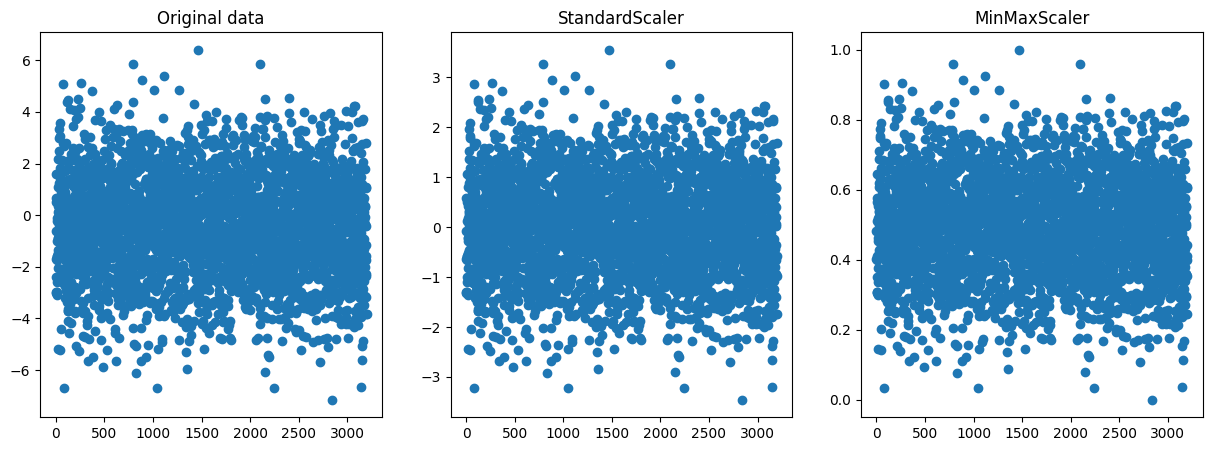

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, QuantileTransformer
import matplotlib.pyplot as plt
data = pandas.read_csv("apple_quality.csv")
target_variable = 'Quality'
data = data.drop(columns=['A_id'])

x = data.drop(columns=[target_variable])
y = data[target_variable].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, Y_train, Y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=17)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)


print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("X_train_minmax shape:", X_train_minmax.shape)
print("X_test_minmax shape:", X_test_minmax.shape)

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

axes[0].scatter(range(len(X_train_scaled)), X_train['Size'])
axes[0].set_title("Original data")

axes[1].scatter(range(len(X_train_scaled)), X_train_scaled[:, 0])
axes[1].set_title("StandardScaler")

axes[2].scatter(range(len(X_train_scaled)), X_train_minmax[:, 0])
axes[2].set_title("MinMaxScaler")

plt.show()


## 4. Обучение на тренировочном множестве
## 5. Посчитайте метрики на train и test множествах
## Для LogisticRegression

Train Accuracy:  0.748125
Test Accuracy:  0.75375
Train ROC-AUC: 0.8238
Test ROC-AUC: 0.8241


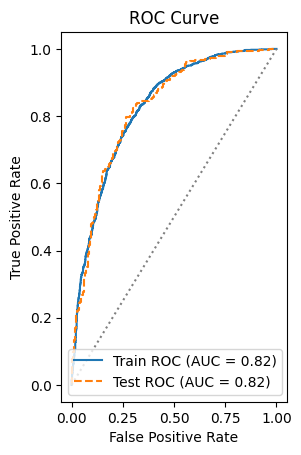

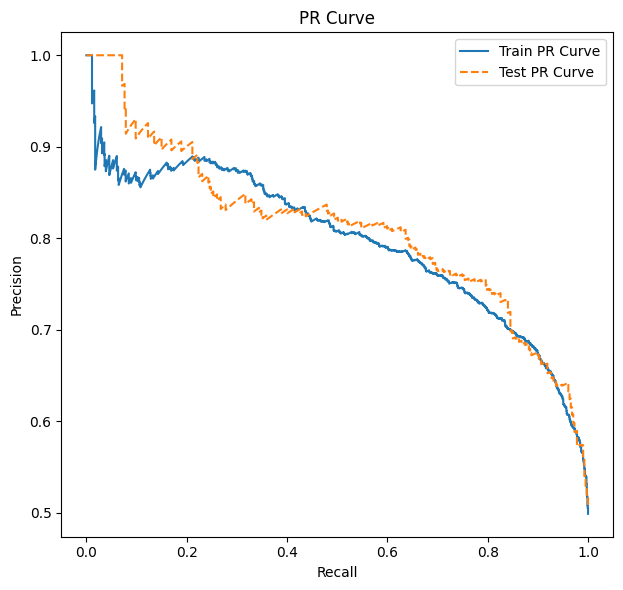

Train F1-Score:  0.751694393099199
Test F1-Score:  0.7570900123304563


In [4]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, accuracy_score, roc_auc_score,precision_recall_curve

# 1. Логистическая регрессия
model = LogisticRegression()

model.fit(X_train_scaled, Y_train)
train_ = model.predict(X_train_scaled)
test_ = model.predict(X_test_scaled)

# accuracy
print("Train Accuracy: ", accuracy_score(Y_train, train_))
print("Test Accuracy: ", accuracy_score(Y_test, test_))

# ROC-AUC
train_roc_auc = roc_auc_score(Y_train, model.predict_proba(X_train_scaled)[:, 1])
test_roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f"Train ROC-AUC: {train_roc_auc:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")

fpr_train, tpr_train, _ = roc_curve(Y_train, model.predict_proba(X_train_scaled)[:, 1])
fpr_test, tpr_test, _ = roc_curve(Y_test, model.predict_proba(X_test_scaled)[:, 1])
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {train_roc_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_roc_auc:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], linestyle=':', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.figure(figsize=(12, 6))

# PR-кривая
train_precision, train_recall, _ = precision_recall_curve(Y_train, model.predict_proba(X_train_scaled)[:, 1])
test_precision, test_recall, _ = precision_recall_curve(Y_test, model.predict_proba(X_test_scaled)[:, 1])

# PR curve
plt.subplot(1, 2, 2)
plt.plot(train_recall, train_precision, label=f'Train PR Curve')
plt.plot(test_recall, test_precision, label=f'Test PR Curve', linestyle='--')
plt.title('PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

# F1-score
train_f1 = f1_score(Y_train, train_)
test_f1 = f1_score(Y_test, test_)
print(f"Train F1-Score: ", train_f1)
print(f"Test F1-Score: ", test_f1)



## 4. Обучение на тренировочном множестве
## 5. Посчитайте метрики на train и test множествах
## Для DecisionTreeClassifier

Train Accuracy:  0.7928125
Test Accuracy:  0.76375
Train ROC-AUC: 0.8804
Test ROC-AUC: 0.8615


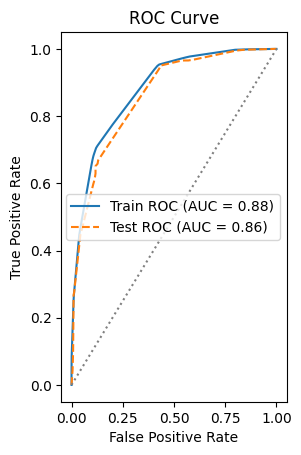

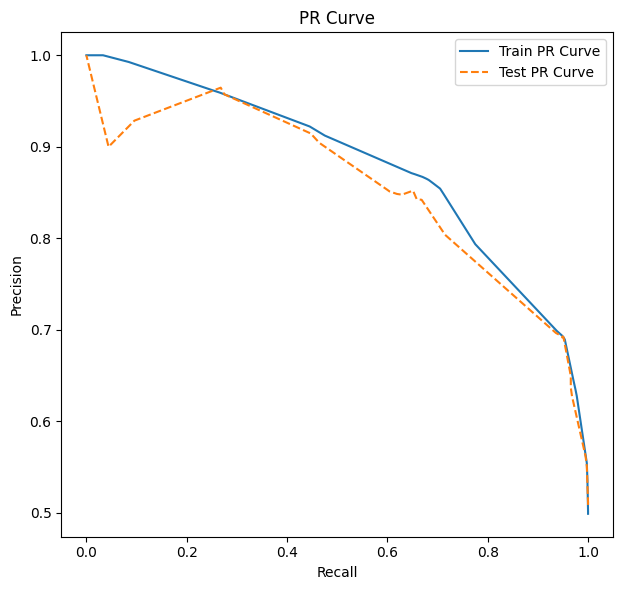

Train F1-Score:  0.7725557461406518
Test F1-Score:  0.7393103448275862


In [5]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_curve, accuracy_score, roc_auc_score,precision_recall_curve

model = DecisionTreeClassifier(max_depth=5, random_state=17)

model.fit(X_train_scaled, Y_train)
train_ = model.predict(X_train_scaled)
test_ = model.predict(X_test_scaled)

# accuracy
print("Train Accuracy: ", accuracy_score(Y_train, train_))
print("Test Accuracy: ", accuracy_score(Y_test, test_))

# ROC-AUC
train_roc_auc = roc_auc_score(Y_train, model.predict_proba(X_train_scaled)[:, 1])
test_roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f"Train ROC-AUC: {train_roc_auc:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")

fpr_train, tpr_train, _ = roc_curve(Y_train, model.predict_proba(X_train_scaled)[:, 1])
fpr_test, tpr_test, _ = roc_curve(Y_test, model.predict_proba(X_test_scaled)[:, 1])
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {train_roc_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_roc_auc:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], linestyle=':', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.figure(figsize=(12, 6))

# PR-кривая
train_precision, train_recall, _ = precision_recall_curve(Y_train, model.predict_proba(X_train_scaled)[:, 1])
test_precision, test_recall, _ = precision_recall_curve(Y_test, model.predict_proba(X_test_scaled)[:, 1])

# PR curve
plt.subplot(1, 2, 2)
plt.plot(train_recall, train_precision, label=f'Train PR Curve')
plt.plot(test_recall, test_precision, label=f'Test PR Curve', linestyle='--')
plt.title('PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

# F1-score
train_f1 = f1_score(Y_train, train_)
test_f1 = f1_score(Y_test, test_)
print(f"Train F1-Score: ", train_f1)
print(f"Test F1-Score: ", test_f1)

## 4. Обучение на тренировочном множестве
## 5. Посчитайте метрики на train и test множествах
## Для KNeighborsClassifier

Train Accuracy:  0.889375
Test Accuracy:  0.88625
Train ROC-AUC: 0.9621
Test ROC-AUC: 0.9591


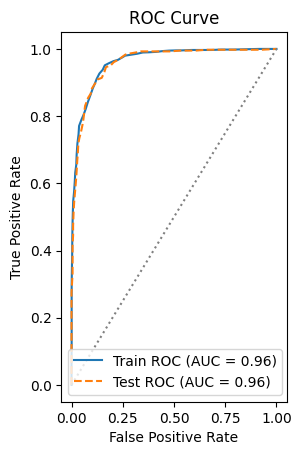

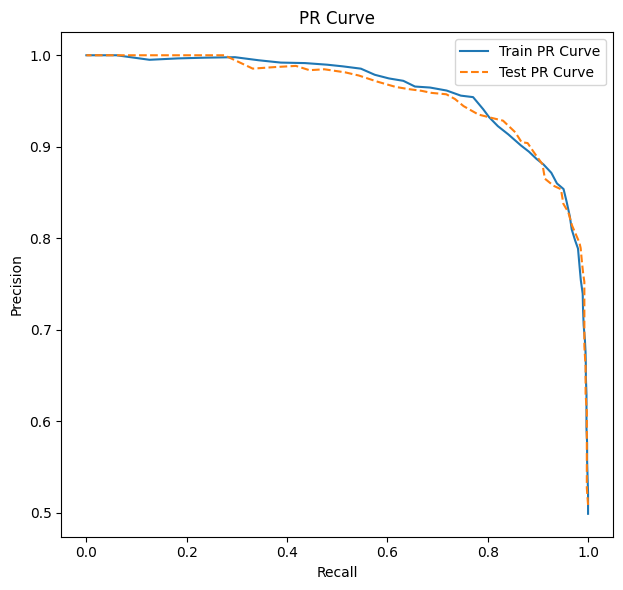

Train F1-Score:  0.8883984867591425
Test F1-Score:  0.8858218318695107


In [6]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_curve, accuracy_score, roc_auc_score,precision_recall_curve

model = KNeighborsClassifier(n_neighbors=50)
model.fit(X_train_scaled, Y_train)
train_k_neighbors = model.predict(X_train_scaled)
test_k_neighbors = model.predict(X_test_scaled)

model.fit(X_train_scaled, Y_train)
train_ = model.predict(X_train_scaled)
test_ = model.predict(X_test_scaled)

# accuracy
print("Train Accuracy: ", accuracy_score(Y_train, train_))
print("Test Accuracy: ", accuracy_score(Y_test, test_))

# ROC-AUC
train_roc_auc = roc_auc_score(Y_train, model.predict_proba(X_train_scaled)[:, 1])
test_roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f"Train ROC-AUC: {train_roc_auc:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")

fpr_train, tpr_train, _ = roc_curve(Y_train, model.predict_proba(X_train_scaled)[:, 1])
fpr_test, tpr_test, _ = roc_curve(Y_test, model.predict_proba(X_test_scaled)[:, 1])
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {train_roc_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_roc_auc:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], linestyle=':', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.figure(figsize=(12, 6))

# PR-кривая
train_precision, train_recall, _ = precision_recall_curve(Y_train, model.predict_proba(X_train_scaled)[:, 1])
test_precision, test_recall, _ = precision_recall_curve(Y_test, model.predict_proba(X_test_scaled)[:, 1])

# PR curve
plt.subplot(1, 2, 2)
plt.plot(train_recall, train_precision, label=f'Train PR Curve')
plt.plot(test_recall, test_precision, label=f'Test PR Curve', linestyle='--')
plt.title('PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

# F1-score
train_f1 = f1_score(Y_train, train_)
test_f1 = f1_score(Y_test, test_)
print(f"Train F1-Score: ", train_f1)
print(f"Test F1-Score: ", test_f1)

## 4. Обучение на тренировочном множестве
## 5. Посчитайте метрики на train и test множествах
## Для RandomForestClassifier

Train Accuracy:  0.9125
Test Accuracy:  0.87
Train ROC-AUC: 0.9747
Test ROC-AUC: 0.9415


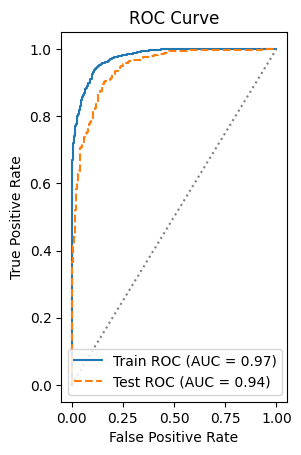

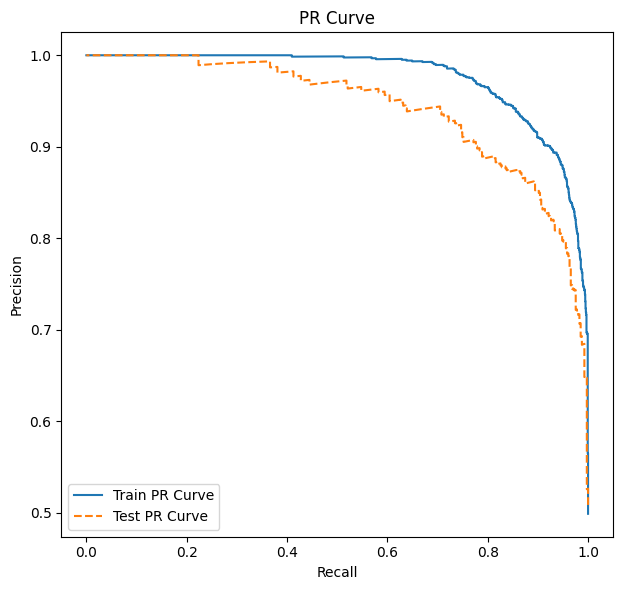

Train F1-Score:  0.9146341463414634
Test F1-Score:  0.87409200968523


In [7]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_curve, accuracy_score, roc_auc_score,precision_recall_curve


model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=17)

model.fit(X_train_scaled, Y_train)
train_ = model.predict(X_train_scaled)
test_ = model.predict(X_test_scaled)

# accuracy
print("Train Accuracy: ", accuracy_score(Y_train, train_))
print("Test Accuracy: ", accuracy_score(Y_test, test_))

# ROC-AUC
train_roc_auc = roc_auc_score(Y_train, model.predict_proba(X_train_scaled)[:, 1])
test_roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f"Train ROC-AUC: {train_roc_auc:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")

fpr_train, tpr_train, _ = roc_curve(Y_train, model.predict_proba(X_train_scaled)[:, 1])
fpr_test, tpr_test, _ = roc_curve(Y_test, model.predict_proba(X_test_scaled)[:, 1])
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {train_roc_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_roc_auc:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], linestyle=':', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.figure(figsize=(12, 6))

# PR-кривая
train_precision, train_recall, _ = precision_recall_curve(Y_train, model.predict_proba(X_train_scaled)[:, 1])
test_precision, test_recall, _ = precision_recall_curve(Y_test, model.predict_proba(X_test_scaled)[:, 1])

# PR curve
plt.subplot(1, 2, 2)
plt.plot(train_recall, train_precision, label=f'Train PR Curve')
plt.plot(test_recall, test_precision, label=f'Test PR Curve', linestyle='--')
plt.title('PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

# F1-score
train_f1 = f1_score(Y_train, train_)
test_f1 = f1_score(Y_test, test_)
print(f"Train F1-Score: ", train_f1)
print(f"Test F1-Score: ", test_f1)

6. Сравните метрики относительно train/test, так и относительно разных моделей


Какая модель справилась лучше с поставленной задачей?
KNeighborsClassifier показал наилучшие результаты на тестовых данных с минимальной разницей между train и test метриками, особенно в ROC-AUC и F1-score.

Имеет ли место переобучение?
RandomForestClassifier явно демонстрирует переобучение, так как метрики на обучении максимальные, а на тесте заметно ниже.

Имеет ли место недообучение?
Логистическая регрессия может страдать от недообучения, так как её метрики ниже по сравнению с другими моделями, особенно в контексте ROC-AUC.

Как можно улучшить метрики моделей?
Для уменьшения переобучения можно использовать регуляризацию или ограничить глубину моделей, таких как RandomForest и DecisionTree. Для улучшения недообученных моделей стоит попробовать более сложные архитектуры или добавить новые признаки.